<a href="https://colab.research.google.com/github/andrea0026/Prediccion-de-ventas/blob/main/sales_prediction_pry1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicción de ventas para productos alimenticios vendidos en diversas tiendas.  El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
filename = '/content/drive/MyDrive/Data_science/archivos/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Diccionario de datos para este conjunto de datos:**

Nombre de la variable: Descripción

Item_Identifier: Identificación única del producto

Item_Weight: Peso del producto

Item_Fat_Content: Si el producto es bajo en grasa o regular

Item_Visibility: Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto

Item_Type: Categoría a la que el producto pertenece

Item_MRP: Precio máximo de venta al público (precio de catálogo) del producto

Outlet_Identifier: Identificación única de la tienda

Outlet_Establishment_Year: El año en que se estableció la tienda

Outlet_Size: El tamaño de la tienda en cuanto al área total

Outlet_Location_Type: El tipo de área donde se encuentra la tienda

Outlet_Type: Si el punto de venta es una tienda de comestibles o algún tipo de supermercado

Item_Outlet_Sales: Ventas del producto en una tienda particular. Es la variable objetivo a predecir.

Exploración de datos:

In [4]:
#1. Numero de filas y columnas
df.shape

(8523, 12)

In [5]:
#2. Tipos de datos en cada variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#3. verificación de duplicados
df.duplicated().any()

False

In [7]:
#4. Identificación de valores faltantes
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
#5. Tratamiento de datos faltantes
#No se eliminaran los filas ni columnas con datos faltantes ya que estariamos perdiendo gran cantidad de información, 
#Por lo tanto se llenaran los datos faltantes de peso con un promedio de los datos.
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
# y la columna de tamaño de la tienda, ya que es categorica, se llenará con el valor 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
# 6. Confirmar que no hay valores faltantes
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
#7. Identificar inconsistencias en los datos 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [8]:
#Arreglar la cateoria "Regular"
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace('reg', "Regular")

In [9]:
#Arreglar la cateoria "Low Fat"
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace('LF', "Low Fat")

In [10]:
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace('low fat', "Low Fat")

In [11]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# 8. Estadísticas resumidas de las columnas numéricas: 
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.81,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


Tercera parte, Objetivo: Comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

In [12]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

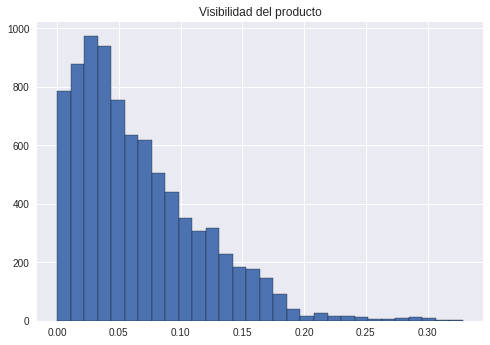

In [ ]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(bins=30, edgecolor='black')
plt.title('Visibilidad del producto')
plt.show()

#El histograma muestra una distribucion en  la visibilidad del produducto sesgada a la derecha.
# En x mayor a 0,25 se pueden estar presentando valores atipicos.

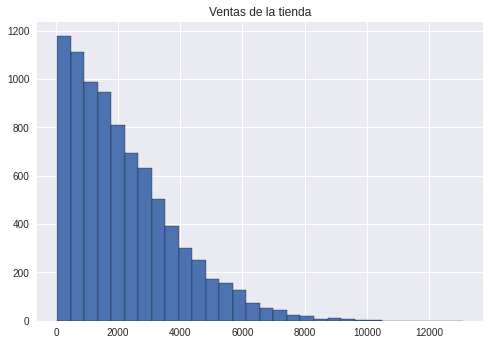

In [ ]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=30, edgecolor='black')
plt.title('Ventas de la tienda')
plt.show()

#las ventas de la tienda muestra un sesgo hacia la derecha.

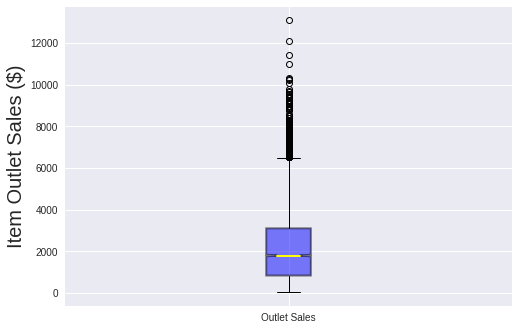

In [ ]:
# Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

ventas = df['Item_Outlet_Sales']
plt.boxplot([ventas],
                        notch=True,
                        labels=['Outlet Sales'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5));

plt.ylabel('Item Outlet Sales ($)', fontsize = 20);

#Se presenta un número importante de valores atípicos por encima de 6000.
# La mayor concentración de datos sobre el valor de las ventas se encuentra entre 1000 y 3500 aprox.

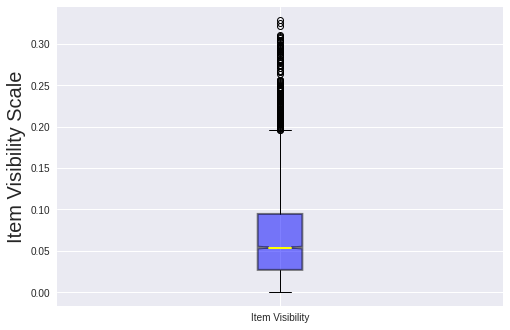

In [ ]:
visibility = df['Item_Visibility']
plt.boxplot([visibility],
                        notch=True,
                        labels=['Item Visibility'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Item Visibility Scale', fontsize = 20);

# La gráfica muestra un gran número de valores atípicos, es importante entrar a analizar con mas detalle estos datos.

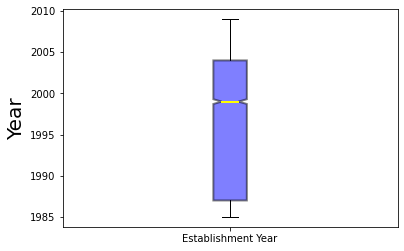

In [ ]:
year = df['Outlet_Establishment_Year']
plt.boxplot([year],
                        notch=True,
                        labels=['Establishment Year'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Year', fontsize = 20);

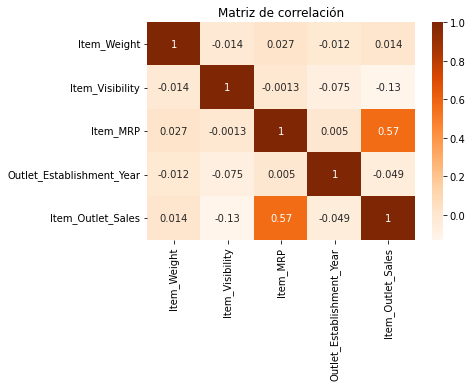

In [ ]:
# Mapa de calor de la correlación entre las características.

corr = df.corr()
sns.heatmap(corr, cmap="Oranges", annot=True);
plt.title('Matriz de correlación')
plt.show()

#El gráfico muestra una correlación moderada entre el precio máximo de venta y las ventas del producto,
#Dado que el coeficiente de correlación es positivo se infiere que si aumenta MRP también aumentaran las ventas del producto.

# También vemos que existe una correlación casi nula entre la visibilidad del producto y las ventas de la tienda, es decir, 
#un producto que ocupe mayor espacio físico en la tienda no vende más.

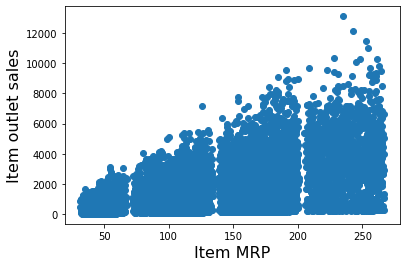

In [ ]:
#Scatter plot
plt.scatter(x=df['Item_MRP'], y=df['Item_Outlet_Sales']);
plt.ylabel('Item outlet sales', fontsize = 16);
plt.xlabel('Item MRP', fontsize = 16);
plt.show()

#Dada la correlación positiva que se muestra en la gráfica anterior, 
#podemos ver en el siguiente grafico de dispersión el comportamiento de los datos entre estas dos variables y su relación.

Cuarta parte: Crear numerosas visualizaciones de datos para ayudar a las partes interesadas a comprender mejor las tendencias de los datos.

Crear un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

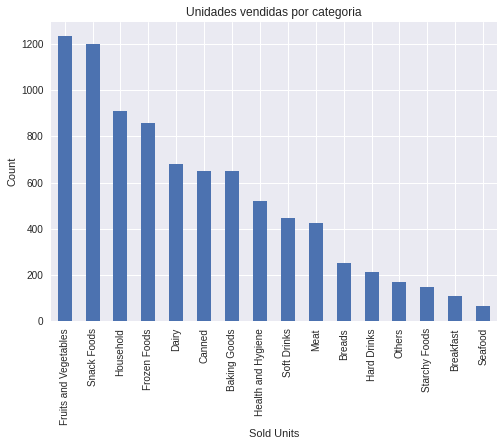

La categoria mas vendida es frutas y vegetales


In [ ]:
# Este gráfico de barras muestra la cantidad de unidades vendidas por categoria, esta información puede ayudar a enfocar la fuerza de ventas.
plt.style.use('seaborn')
categorias = df['Item_Type'].value_counts()
categorias.plot(kind = 'bar')
                  
plt.xlabel('Sold Units')
plt.ylabel('Count')
plt.title('Unidades vendidas por categoria')

plt.show()

print('La categoria mas vendida es frutas y vegetales')

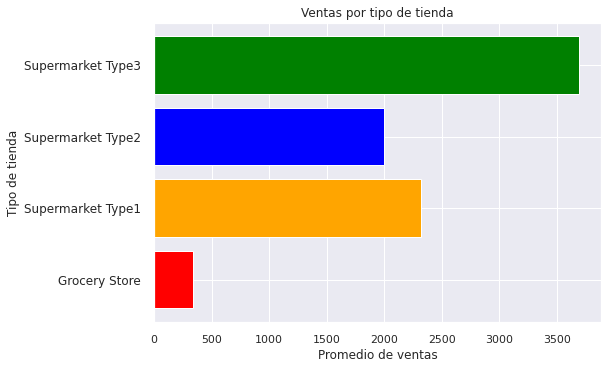

In [ ]:
# El gráfico nos muestra cual tienda presenta el mayor número de ventas. 
sales_avg_store = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index(name='Avg Sales')
plt.barh(sales_avg_store['Outlet_Type'],sales_avg_store['Avg Sales'],color = ['red','orange','blue','green']),

plt.yticks(size =12)
plt.yticks(size =12)
plt.xlabel ('Promedio de ventas')
plt.ylabel ('Tipo de tienda')
plt.title ('Ventas por tipo de tienda');

In [ ]:
import matplotlib as mpl

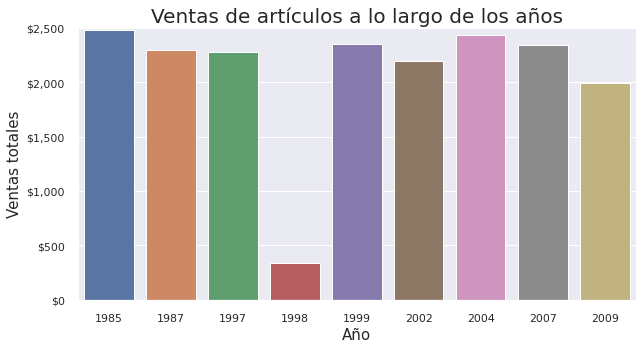

In [ ]:
#El gráfico nos muestra que las ventas muestran una cierta consistencia a traves de los años a excepcion del año 1998. En 2009 las ventas tambien son bajas.
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="darkgrid")
plt.xlim(1985, 2009)
plt.ylim(0,2500)
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
plt.title("Ventas de artículos a lo largo de los años", fontdict={"fontsize": 20})
sns.barplot(x="Outlet_Establishment_Year",
             palette='deep',
             y="Item_Outlet_Sales", 
             data=df, ci=None);
plt.ylabel("Ventas totales", size=15);
plt.xlabel("Año", size=15);

Parte 5. objetivo de este paso es ayudar al distribuidor usando el aprendizaje automático para hacer predicciones sobre futuras ventas basándose en los datos proporcionados.

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [37]:
# Identifiquen el objetivo (X) y las características (y): 
#Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  

X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
#Realicen un train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
#Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

#Identificar cada característica como numérica, ordinal o nominal. 
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [39]:
#Imputar algún valor faltante. Utilizar la estrategia “mean” para las columnas numéricas y la estrategia “most_frequent” para las columnas categóricas
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [40]:
#Realizar una codificación one-hot a las características nominales.

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [41]:
print(X_train.isna().sum().sum())
X_train.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                6392 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                6392 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


In [42]:
#Escalar las columnas numéricas.

scaler = StandardScaler()

In [43]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [44]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [45]:
#Todos los datos de preprocesamiento deben estar contenidos en un único objeto de preprocesamiento.

# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6833101e50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6833101e90>)])

In [46]:
#Utilizar el objeto de preprocesamiento para transformar los datos de manera adecuada

# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6833101e50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6833101e90>)])

In [47]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)